In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

In [2]:
data = pd.read_csv("Data.csv")
data.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,3.0,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,NaN,NaN,NO,18,On net 200F=Unlimited _call24H,3.0,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NO,50,NaN,NaN,0


In [3]:
len(data)

400000

In [4]:
data['CHURN'].value_counts()

0    325156
1     74844
Name: CHURN, dtype: int64

In [5]:
data['REGION'] = data['REGION'].fillna(method = 'pad')
data['MONTANT'] = data['MONTANT'].fillna(data['MONTANT'].mean())
data['REGION'] = data['REGION'].fillna(method = 'pad')
data['FREQUENCE_RECH'] = data['FREQUENCE_RECH'].fillna(data['FREQUENCE_RECH'].mean())
data['REVENUE'] = data['REVENUE'].fillna(data['REVENUE'].mean())
data['ARPU_SEGMENT'] = data['ARPU_SEGMENT'].fillna(data['ARPU_SEGMENT'].mean())
data['FREQUENCE'] = data['FREQUENCE'].fillna(data['FREQUENCE'].mean())
data['DATA_VOLUME'] = data['DATA_VOLUME'].fillna(data['DATA_VOLUME'].mean())
data['ON_NET'] = data['ON_NET'].fillna(data['ON_NET'].mean())
data['ORANGE'] = data['ORANGE'].fillna(data['ORANGE'].mean())
data['TIGO'] = data['TIGO'].fillna(data['TIGO'].mean())
data['ZONE1'] = data['ZONE1'].fillna(data['ZONE1'].mean())
data['ZONE2'] = data['ZONE2'].fillna(data['ZONE2'].mean())
data['TOP_PACK'] = data['TOP_PACK'].fillna(method = 'ffill')
data['MONTANT'] = data['MONTANT'].fillna(method = 'ffill')
data['FREQ_TOP_PACK'] = data['MONTANT'].fillna(data['FREQ_TOP_PACK'].mean())

In [6]:
correlation = data.corr()
correlation

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
MONTANT,1.000000,0.800385,0.963619,0.963619,0.767200,0.245760,0.317499,0.639525,0.375176,0.163704,0.182060,0.368902,1.000000,-0.047764
FREQUENCE_RECH,0.800385,1.000000,0.794491,0.794490,0.938795,0.138084,0.388358,0.499740,0.298842,0.049399,0.061274,0.392142,0.800385,-0.055355
REVENUE,0.963619,0.794491,1.000000,1.000000,0.791627,0.253984,0.320911,0.643450,0.372736,0.166975,0.167071,0.382919,0.963619,-0.054105
ARPU_SEGMENT,0.963619,0.794490,1.000000,1.000000,0.791627,0.253984,0.320911,0.643450,0.372736,0.166975,0.167071,0.382918,0.963619,-0.054105
FREQUENCE,0.767200,0.938795,0.791627,0.791627,1.000000,0.152688,0.376349,0.451638,0.261504,0.043156,0.061955,0.423920,0.767200,-0.065821
DATA_VOLUME,0.245760,0.138084,0.253984,0.253984,0.152688,1.000000,-0.007786,0.036188,0.014105,0.007699,0.011453,0.128075,0.245760,-0.017113
ON_NET,0.317499,0.388358,0.320911,0.320911,0.376349,-0.007786,1.000000,0.213999,0.127618,0.003908,-0.005437,0.188137,0.317499,-0.026116
ORANGE,0.639525,0.499740,0.643450,0.643450,0.451638,0.036188,0.213999,1.000000,0.386718,0.019514,0.006672,0.201069,0.639525,-0.024344
TIGO,0.375176,0.298842,0.372736,0.372736,0.261504,0.014105,0.127618,0.386718,1.000000,0.003310,0.004860,0.099173,0.375176,-0.010031
ZONE1,0.163704,0.049399,0.166975,0.166975,0.043156,0.007699,0.003908,0.019514,0.003310,1.000000,0.009791,0.009703,0.163704,0.002990


In [7]:
data.isna().sum()

user_id           0
REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
MRG               0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [8]:
data["TOP_PACK"].head(12)

0              All-net 500F=2000F;5d
1               Data: 100 F=40MB,24H
2              All-net 500F=2000F;5d
3     On net 200F=Unlimited _call24H
4     On net 200F=Unlimited _call24H
5                   Data:490F=1GB,7d
6                   Data:490F=1GB,7d
7                   Data:490F=1GB,7d
8                  Data:1000F=5GB,7d
9                  Data:1000F=5GB,7d
10                 Data:1000F=5GB,7d
11              VAS(IVR_Radio_Daily)
Name: TOP_PACK, dtype: object

In [9]:
data.columns

Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
       'CHURN'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         400000 non-null  object 
 1   REGION          400000 non-null  object 
 2   TENURE          400000 non-null  object 
 3   MONTANT         400000 non-null  float64
 4   FREQUENCE_RECH  400000 non-null  float64
 5   REVENUE         400000 non-null  float64
 6   ARPU_SEGMENT    400000 non-null  float64
 7   FREQUENCE       400000 non-null  float64
 8   DATA_VOLUME     400000 non-null  float64
 9   ON_NET          400000 non-null  float64
 10  ORANGE          400000 non-null  float64
 11  TIGO            400000 non-null  float64
 12  ZONE1           400000 non-null  float64
 13  ZONE2           400000 non-null  float64
 14  MRG             400000 non-null  object 
 15  REGULARITY      400000 non-null  int64  
 16  TOP_PACK        400000 non-null  object 
 17  FREQ_TOP_P

In [11]:
data = data.drop(columns = ["user_id", "REGION", "TENURE", "MRG", "TOP_PACK"], axis = 1)
data.head()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
0,17000.000000,32.000000,18000.0,6000.0,34.0,3369.763441,97.0,355.0,6.000000,7.874282,7.187003,62,17000.000000,0
1,4300.000000,29.000000,4427.0,1476.0,37.0,1764.000000,8.0,3.0,0.000000,7.874282,2.000000,40,4300.000000,0
2,1500.000000,3.000000,1500.0,500.0,3.0,3369.763441,30.0,30.0,23.134608,7.874282,7.187003,32,1500.000000,0
3,1500.000000,3.000000,2497.0,832.0,4.0,0.000000,159.0,45.0,19.000000,7.874282,7.187003,18,1500.000000,0
4,5522.971346,11.503733,498.0,166.0,3.0,1.000000,1.0,3.0,23.134608,7.874282,7.187003,50,5522.971346,0


In [12]:
# Scalling the Data
sc = StandardScaler()
sc.fit_transform(data)

array([[ 2.00617459e+00,  1.91601564e+00,  2.13786730e+00, ...,
         1.52375742e+00,  2.00617459e+00, -4.79769471e-01],
       [-2.13774324e-01,  1.63557204e+00, -1.84534111e-01, ...,
         5.36446370e-01, -2.13774324e-01, -4.79769471e-01],
       [-7.03211881e-01, -7.94939145e-01, -6.85356990e-01, ...,
         1.77424171e-01, -7.03211881e-01, -4.79769471e-01],
       ...,
       [-8.43051183e-01, -8.88420345e-01, -8.22411696e-01, ...,
        -5.85498003e-01, -8.43051183e-01, -4.79769471e-01],
       [ 0.00000000e+00,  0.00000000e+00, -9.40473803e-01, ...,
        -1.03427575e+00,  0.00000000e+00,  2.08433438e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.55618638e-16, ...,
        -1.21378685e+00,  0.00000000e+00, -4.79769471e-01]])

In [13]:
data.shape

(400000, 14)

In [14]:
data.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.00000
mean,5522.971346,11.503733,5505.487757,1835.167658,13.951835,3369.763441,275.917586,95.532927,23.134608,7.874282,7.187003,28.046502,5522.971346,0.18711
std,5720.859508,10.697351,5844.388871,1948.125688,11.956196,8752.618996,696.386587,156.484600,39.960208,10.032222,6.809694,22.282773,5720.859508,0.39000
min,20.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000,0.00000
25%,2000.000000,4.000000,1900.000000,633.000000,6.000000,240.000000,12.000000,20.000000,11.000000,7.874282,7.187003,6.000000,2000.000000,0.00000
50%,5522.971346,11.503733,5505.487757,1835.167658,13.951835,3369.763441,209.000000,95.532927,23.134608,7.874282,7.187003,24.000000,5522.971346,0.00000
75%,5522.971346,11.503733,5505.487757,1835.167658,13.951835,3369.763441,275.917586,95.532927,23.134608,7.874282,7.187003,51.000000,5522.971346,0.00000
max,226550.000000,133.000000,233413.000000,77804.000000,91.000000,934576.000000,45011.000000,6788.000000,2758.000000,1657.000000,1011.000000,62.000000,226550.000000,1.00000


In [15]:
data.head()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
0,17000.000000,32.000000,18000.0,6000.0,34.0,3369.763441,97.0,355.0,6.000000,7.874282,7.187003,62,17000.000000,0
1,4300.000000,29.000000,4427.0,1476.0,37.0,1764.000000,8.0,3.0,0.000000,7.874282,2.000000,40,4300.000000,0
2,1500.000000,3.000000,1500.0,500.0,3.0,3369.763441,30.0,30.0,23.134608,7.874282,7.187003,32,1500.000000,0
3,1500.000000,3.000000,2497.0,832.0,4.0,0.000000,159.0,45.0,19.000000,7.874282,7.187003,18,1500.000000,0
4,5522.971346,11.503733,498.0,166.0,3.0,1.000000,1.0,3.0,23.134608,7.874282,7.187003,50,5522.971346,0


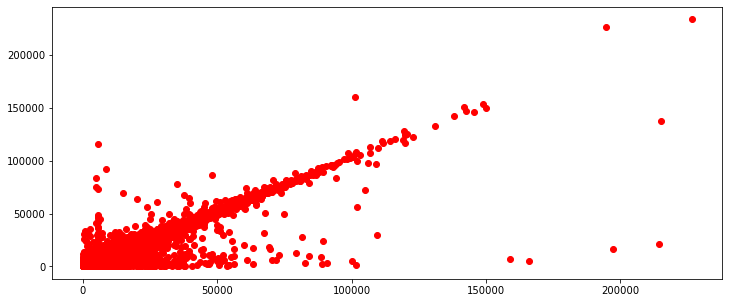

In [16]:
plt.figure(figsize = (12,5))
plt.scatter(x = data['MONTANT'], y = data['REVENUE'], color = 'red')
plt.show()

### Checking the Correlation Between the Variables

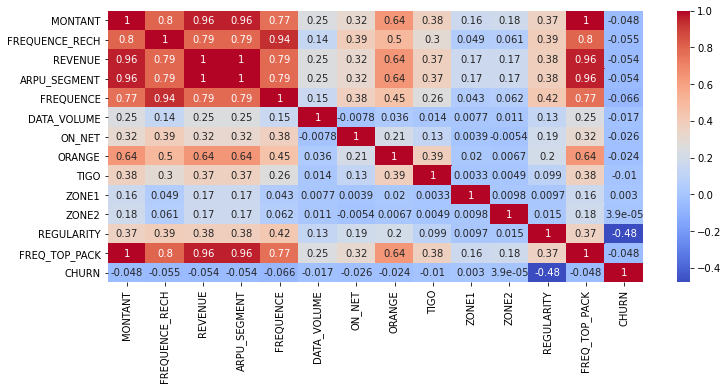

In [17]:
plt.figure(figsize = (12, 5))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
plt.show()

In [18]:
data["CHURN"].value_counts()

0    325156
1     74844
Name: CHURN, dtype: int64

### Splitting, Building, training and Predicting my model 

In [21]:
def building_block():
    
# Spliting the Data
    X = data.drop(columns = ["CHURN"])
    y = data["CHURN"]

# Splitting the Data set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Creating our model
    model = RandomForestClassifier(n_estimators = 100)

# Training the Model
    model.fit(X_train, y_train)

# Making Prediction
    prediction = model.predict(X_test)

# Checking prediction
    accuracy = accuracy_score(prediction, y_test)
    return accuracy

building_block()

0.8593125

### Performing Hyperparameter

In [22]:
model.get_params()

NameError: name 'model' is not defined

We are going to try to adjust 
1. `max_depth`
2. `max_features`
3. `max_sample`
4. `n_estimators`
5. `n_jobs`

In [20]:
grid = {'n_estimators' : [10, 100, 200, 500, 1000, 1200],
       'max_features': ['auto', 'sqrt'],
       'max_sample': [2, 4, 6],
       'max_depth':[None, 5, 10, 20, 30]}

# Spliting
X = data.drop(columns = ['CHURN'])
y = data["CHURN"]

np.random.seed(42)

# Splitting the Data Set
X_train, X_train, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

# Modle Building
model_building = RandomForestClassifier(n_jobs = 1)

# Instanciating the RandomForestClassifier
rs_model_building = RandomForestClassifier(estimator = model_building,
                                          param_distribution = grid,
                                          n_iter = 10,
                                          cv = 5,
                                          verbose = 0)

# Training the Randomized Search CV
rs_model_building(X_train, y_train)

TypeError: __init__() got an unexpected keyword argument 'estimator'